# Análisis Exploratorio de Datos

Se cargan los datos desde la computadora local.

In [2]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
data = pd.read_excel('2.DatasetTransformado20210914_public_ofs-csv.xlsx')
data.to_csv(encoding='utf-8', index=False)
data.head()

Saving 2.DatasetTransformado20210914_public_ofs-csv.xlsx to 2.DatasetTransformado20210914_public_ofs-csv.xlsx


,raison_sociale,siren,num_etablissement,num_da,cfa,effectifs,adresse_voie,adresse_complement_adresse,adresse_code_postal,adresse_ville,sum_stagiaires,sum_heures_stagiaires,code_specialite_1,specialite_1_isInformatique,nb_stagiaires_1,nb_heures_stagiaires_1,code_specialite_2,nb_stagiaires_2,nb_heures_stagiaires_2,code_specialite_3,nb_stagiaires_3,nb_heures_stagiaires_3,code_specialite_4,nb_stagiaires_4,nb_heures_stagiaires_4
0,1000 MERCIS,429621311,27,11755050975,Non,17,28 RUE DE CHATEAUDUN,NaN,75009,PARIS,79,3500.0,326.0,True,79.0,3500.0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN
1,100% ENGLISH,499401610,21,93040083604,Non,7,L AGORA P.A. DU MOULIN NEUF,CHEMIN CHAMPS DE PRUNIERS,4100,MANOSQUE,64,2525.0,136.0,False,64.0,2525.0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN
2,10H10 PRODUCTIONS,879911618,12,11922335992,Non,2,53 Avenue Aristide Briand,NaN,92120,MONTROUGE,1,12.0,320.0,False,1.0,12.0,321.0,0,0.0,NaN,0,NaN,NaN,0,NaN
3,123 CARTONS,328616602,38,52440562044,Non,1,12 IMPASSE DE LA CROIX OLIVE,NaN,44860,PONT ST MARTIN,2,90.0,132.0,False,2.0,90.0,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN
4,1 2 3 CONSEIL,517401808,20,82420212142,Non,8,2 ALLEE GIACOMO PUCCINI,NaN,42100,ST ETIENNE,423,3540.0,314.0,False,10.0,77.0,344.0,413,3463.0,NaN,0,NaN,NaN,0,NaN


Se eliminan los valores atípicos que puedan sesgar la información obtenida en el EDA.

In [3]:
print("Observaciones con outliers: ", len(data))

# Se eliminan outlires del atributo num_etablissement
upper_quartile = data["num_etablissement"].quantile(0.99)
data = data[(data["num_etablissement"] < upper_quartile)]

# Se eliminan outlires del atributo sum_heures_stagiaires
upper_quartile = data["sum_heures_stagiaires"].quantile(0.99)
data = data[(data["sum_heures_stagiaires"] < upper_quartile)]

# Se eliminan outlires del atributo sum_stagiaires
upper_quartile = data["sum_stagiaires"].quantile(0.99)
data = data[(data["sum_stagiaires"] < upper_quartile)]

print("Observaciones sin outliers: ", len(data))


Observaciones con outliers:  21682
Observaciones sin outliers:  20263


Se realizan agrupaciones según los atributos de interés, en particular, se agrupa por ciudad y por especialidad.

In [4]:
sumBySpeciality1 = data.groupby('code_specialite_1')['nb_stagiaires_1', 'nb_heures_stagiaires_1'].agg('sum')
sumByCity = data.groupby('adresse_ville')['sum_stagiaires', 'sum_heures_stagiaires'].agg('sum')
sumByCity.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,sum_stagiaires,sum_heures_stagiaires
adresse_ville,,
ABBARETZ,310,4130.0
ABBEVILLE,232,19878.0
ABLEIGES,945,6585.0
ABLIS,34,406.0
ABOEN,139,3683.0


## Tres técnicas para el EDA

### 1. Análisis descriptivo

Se obtienen las medidas estadísticas más comunes para las columnas de interés en el dataset. 



In [5]:
data['num_etablissement'].describe()

count    20263.000000
mean        26.476583
std         17.300925
min          1.000000
25%         15.000000
50%         21.000000
75%         33.000000
max        162.000000
Name: num_etablissement, dtype: float64

In [6]:
data['sum_stagiaires'].describe()

count    20263.000000
mean       167.855846
std        339.741646
min          1.000000
25%         12.000000
50%         45.000000
75%        157.000000
max       3007.000000
Name: sum_stagiaires, dtype: float64

In [7]:
data['sum_heures_stagiaires'].describe()

count     20263.000000
mean       6899.832355
std       21931.876293
min           1.000000
25%         133.000000
50%         648.000000
75%        3299.500000
max      239955.000000
Name: sum_heures_stagiaires, dtype: float64

Seguidamente, se realizan algunos gráficos para obtener impresiones visuales de los datos. Primero, se grafican las 5 ciudades que poseen más organismos de formación.

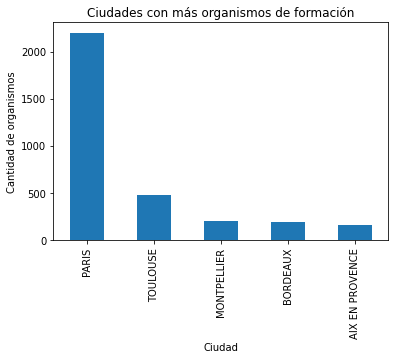

In [23]:
import matplotlib.pyplot as plt
plt.title('Ciudades con más organismos de formación')
plt.xlabel('Ciudad')
plt.ylabel('Cantidad de organismos')
data['adresse_ville'].value_counts()[:5].plot(kind="bar")

Luego, se grafican las 5 especialidades_1 más frecuentes. Estas son las especialidades que tienen mayor popularidad en el conjunto de datos.

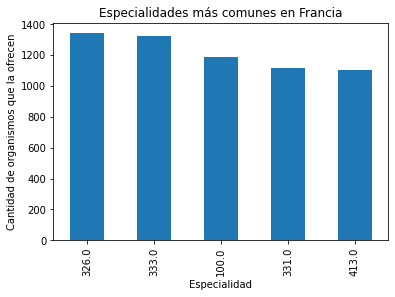

In [31]:
plt.title('Especialidades más comunes en Francia')
plt.xlabel('Especialidad')
plt.ylabel('Cantidad de organismos que la ofrecen')
data['code_specialite_1'].value_counts().head().plot(kind="bar")

Según la información del sitio web oficial de los datos, las 5 especialidades más comunes son:



*   **326:** Informática (*Informatique, traitement de l'information, réseaux de transmission des données*).
*   **333:** Docencia (*Enseignement, formation*).
*   **100:** Estudios generales (*Formations générales*).
*   **331:** Salud (*Santé*).
*   **413:** Desarrollo interpersonal e intrapersonal (*Développement des capacités comportementales et relationnelles*).





### 2. Correlación entre num_establisements y sum_heures_stagiaires

La intuición nos indica que, si un organismo formador tiene más establecimientos, ofrecerá también más horas de formación. Para confirmar esto, primero se realiza un diagrama de dispersión entre estas variables.

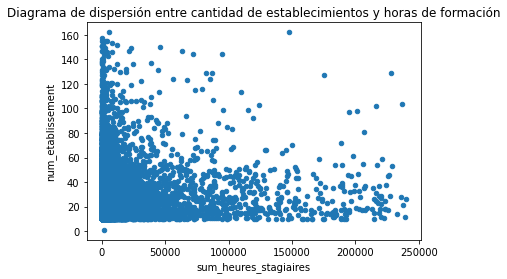

In [30]:
data.plot.scatter(y = 'num_etablissement', x = 'sum_heures_stagiaires', title = "Diagrama de dispersión entre cantidad de establecimientos y horas de formación");

Según el diagrama, parece **no** haber una correlación entre los atributos. Para confirmar esto, se calcula el Coeficiente de Correlación de Pearson.

In [12]:
import numpy as np
coeficientePearson = np.corrcoef(data['num_etablissement'], data['sum_heures_stagiaires'])

print(coeficientePearson)

[[1.         0.06990947]
 [0.06990947 1.        ]]


El umbral para indicar la presencia de una correlación, por lo general, se encuentra entre 0.6 y 0.7 . En este caso, el valor obtenido (0.069), indica que **no** hay correlación entre las variables estudiadas.

### 3. Particionamiento entre París y demás zonas

Primero, se divide el dataset:

In [13]:
dataParis = data[(data["adresse_ville"] == "PARIS")]
dataOtherCities = data[(data["adresse_ville"] != "PARIS")]
print("Observaciones totales = ", len(data))
print("Observaciones de Paris = ", len(dataParis))
print("Observaciones de otras ciudades = ", len(dataOtherCities))

Observaciones totales =  20263
Observaciones de Paris =  2199
Observaciones de otras ciudades =  18064


Luego, se calculan medidas estadísticas específicas para la ciudad de París:

In [14]:
dataParis['num_etablissement'].describe()

count    2199.000000
mean       28.700773
std        18.888388
min        10.000000
25%        16.000000
50%        24.000000
75%        36.000000
max       153.000000
Name: num_etablissement, dtype: float64

In [15]:
dataParis['sum_stagiaires'].describe()

count    2199.000000
mean      235.738063
std       415.837737
min         1.000000
25%        19.500000
50%        75.000000
75%       242.000000
max      3007.000000
Name: sum_stagiaires, dtype: float64

In [16]:
dataParis['sum_heures_stagiaires'].describe()

count      2199.000000
mean       8178.093679
std       23445.529729
min           1.000000
25%         182.000000
50%        1050.000000
75%        4945.000000
max      227482.000000
Name: sum_heures_stagiaires, dtype: float64

Finalmente, se grafican las 5 especialidades_1 más frecuentes en París. 

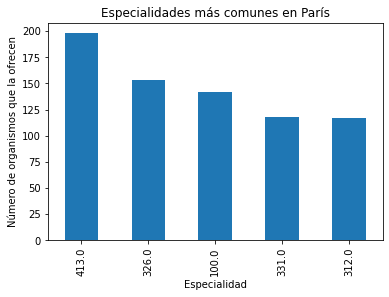

In [27]:
plt.title('Especialidades más comunes en París')
plt.xlabel('Especialidad')
plt.ylabel('Número de organismos que la ofrecen')
dataParis['code_specialite_1'].value_counts().head().plot(kind="bar")

Según la información del sitio web oficial de los datos, las 5 especialidades más comunes son:


*   **413:** Desarrollo interpersonal e intrapersonal (*Développement des capacités comportementales et relationnelles*).
*   **326:** Informática (*Informatique, traitement de l'information, réseaux de transmission des données*).
*   **100:** Estudios generales (*Formations générales*).
*   **331:** Salud (*Santé*).
*   **312:** Comercio y ventas (*Commerce, vente*).





También, se desea conocer la especialidad que tiene más pasantes y más horas de formación en París. Para eso, primero se realiza un *groupby* por especialidad sobre el dataset que solo contiene datos de París, y se suman los atributos de las columnas *nb_stagiaires_1* y *nb_heures_stagiaires_1*.

In [18]:
sumBySpeciality1Paris = dataParis.groupby('code_specialite_1')['nb_stagiaires_1', 'nb_heures_stagiaires_1'].agg('sum')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Luego, se ordenan por el atributo *nb_stagiaires_1*, en orden descendente.

In [93]:
sumBySpeciality1Paris.sort_values(by='nb_stagiaires_1', ascending=False)

,nb_stagiaires_1,nb_heures_stagiaires_1
code_specialite_1,,
331.0,38382.0,810450.0
413.0,37370.0,618282.0
326.0,25022.0,670616.0
312.0,23270.0,1388693.0
100.0,22827.0,682129.0
...,...,...
111.0,16.0,343.0
222.0,10.0,90.0
116.0,10.0,140.0


La especialidad 331, Salud, es la que tiene más pasantes en París, con 38 382 estudiantes. Por otro lado, Materiales de Construcción, la especialidad 224, solo cuenta con 1 pasante. Informática es la tercera especialidad más popular en París, con poco más de 25 000 pasantes.

Seguidamente, se ordenan por la cantidad de horas de formación.

In [19]:
sumBySpeciality1Paris.sort_values(by='nb_heures_stagiaires_1', ascending=False)

,nb_stagiaires_1,nb_heures_stagiaires_1
code_specialite_1,,
312.0,23270.0,1388693.0
331.0,38382.0,810450.0
100.0,22827.0,682129.0
326.0,25022.0,670616.0
413.0,37370.0,618282.0
...,...,...
225.0,35.0,210.0
223.0,52.0,193.0
220.0,31.0,174.0


La especialidad 312, Comercio y Ventas, es la que tiene más horas de formación, con aproximadamente 59 horas de estudio por pasante. Informática, por su parte, es la cuarta especialidad con más horas de formación, con poco menos de 27 horas de estudio por pasante.

## Dos gráficas

## Dos atributos problemáticos

### 1. CFA

### 2. Adresse_voie

## Conclusiones